In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import ResoFit
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance
import numpy as np

**Global paramters**
  - min energy of **7 eV** (has to be greater than **1 x 10<sup>-5</sup> eV**)
  - max energy of **150 eV** (has to be less than **3000 eV**)
  - energy steps to interpolate database: **0.1 eV**

In [2]:
# Global parameters
energy_min = 7
energy_max = 150
energy_step = 0.01

**File locations for calibriation and resonance fitting**

  - */data (directory to locate the file)
  - data_file (YOUR_DATA_FILE.txt or .csv)
  - spectra_file (YOUR_SPECTRA_FILE.txt or .csv)

In [3]:
folder = 'data'
data_file = 'all_thin.txt'
spectra_file = 'Image002_Spectra.txt'

**Sample info**

  - **Gd** foil
  - **thickness** neutron path within the sample in (**mm**)
  - **density** sample density in (**g/cm<sup>3</sup>**), if omitted, pure solid density will be used in fitting
  - **repeat** : reptition number if the data is summed of multiple runs (**default: 1**)

In [4]:
layer_1 = 'Gd'
thickness_1 = 0.15  # mm
density_1 = np.NaN #g/cm^3 (if omitted, pure solid density will be used in fitting)
repeat = 5 

**Estimated intrumetal parameters**

  - input estimated **source to detector distance** (**m**)
  - input estimated possible **time offset** in spectra file (**us**)

In [5]:
source_to_detector_m = 16.
offset_us = 0

**Calibration initialization**

  - Pass all the parameters definded above into the Calibration()

In [6]:
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          layer_1=layer_1,
                          thickness_1=thickness_1,
                          density_1=np.NaN,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          repeat=repeat,
                          folder=folder)

**Calibrate instrument parameters**

  - using **source_to_detector_m** or **offset_us** or **both** to minimize the difference between the measured resonance signals and the simulated resonance signals from *ImagingReso* within the range specified in **global parameters**
  - **vary** can be one of **['source_to_detector', 'offset', 'all']** (default is **'all'**)
  - fitting parameters are displayed

In [7]:
calibration.calibrate(source_to_detector_m=source_to_detector_m,
                      offset_us=offset_us,
                      vary='all')

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                2.784     -inf      inf  0.06226     True     None     None
source_to_detector_m     16.45     -inf      inf 0.005113     True     None     None


**Retrieve calibrated instrument parameters**

In [8]:
calibration.calibrated_offset_us

2.7844490583292183

In [9]:
calibration.calibrated_source_to_detector_m

16.452438260036192

**Plot calibration result**

  - using the best fitted **source_to_detector_m** and **offset_us** to show the calibrated resonance signals from measured data and the expected resonance positions from *ImagingReso*
  - measured data before and after is ploted with raw data points instead of interpolated data points. However, the interpolated data was used during the calibration step above.

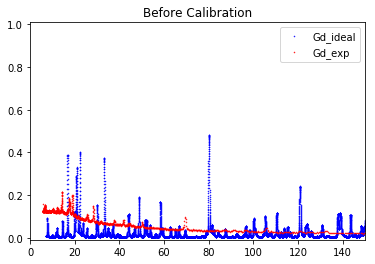

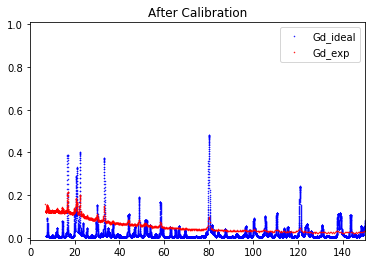

In [10]:
calibration.plot_before()
calibration.plot_after()

**Resonance Fitting**

- based on Beer-Lambert Law:

$$T\left( E \right) =\frac { I\left( E \right)  }{ { I }_{ 0 }\left( E \right)  } =exp\left[ -\sum\nolimits_i { { N }_{ i }{ d }_{ i } } \sum\nolimits_j { { \sigma  }_{ ij }\left( E \right) { A }_{ ij } }  \right]$$

*N<sub>i<sub>* : number of atoms per unit volume of element *i*,

*d<sub>i<sub>* : effective thickness along the neutron path of element *i*,

*σ<sub>ij<sub>*(E)  : energy-dependent neutron total cross-section for the isotope *j* of element *i*,

*A<sub>ij<sub>* : abundance for the isotope *j* of element *i*.

$${N_i} = {N_A}{C_i} = \frac{{{N_A}{\rho _i}}}{{\sum\nolimits_j {{m_{ij}}{A_{ij}}} }}$$

*N<sub>A<sub>* : Avogadro’s number,

*C<sub>i<sub>* : molar concentration of element *i*,

*ρ<sub>i<sub>* : density of the element *i*,

*m<sub>ij<sub>* : atomic mass values for the isotope *j* of element *i*.

**Fitting initialization**

  - Pass all the parameters definded and calibrated into the FitResonance()

In [11]:
fit = FitResonance(spectra_file=spectra_file,
                   data_file=data_file,
                   layer=layer_1,
                   repeat=repeat,
                   energy_min=energy_min,
                   energy_max=energy_max,
                   energy_step=energy_step,
                   calibrated_offset_us=calibration.calibrated_offset_us,
                   calibrated_source_to_detector_m=calibration.calibrated_source_to_detector_m)

**Fit resonance signals**

  - using **thickness** (mm) or **density** (g/cm<sup>3</sup>) to minimize the difference between the measured resonance signals and the simulated resonance signals from *ImagingReso* within the range specified in **global parameters**
  - **vary** can be one of **['thickness', 'density']** (default is **'density'**)
  - fitting parameters are displayed

In [13]:
fit.fit(thickness=thickness_1, density=density_1, vary='density')

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
density       3.695        0      inf  0.04374     True     None     None
thickness      0.15        0      inf        0    False     None     None


**Output fitted density in terms of molar concentration**

  - unit: mol/cm<sup>3</sup>

In [14]:
fit.molar_conc(layer_1)

Molar conc. of element Gd in layer Gd is: 0.02350014075607628 (mol/cm3)


0.023500140756076281

**Plot fitting result**

  - using the best fitted **density** to show the measured resonance signals and the fitted resonance signals from *ImagingReso*
  - measured data before and after is ploted with raw data points instead of interpolated data points. However, the interpolated data was used during the fitting step above.

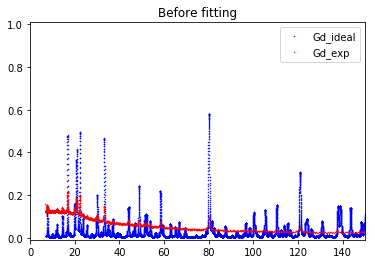

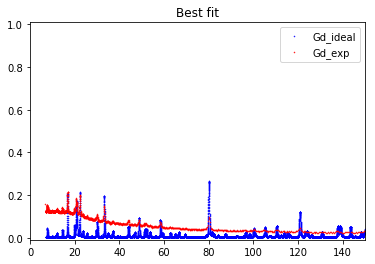

In [15]:
fit.plot_before()
fit.plot_after()